In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import wordcloud

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from tensorflow.keras import layers




# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import sys
sys.path.append('/kaggle/input/dk-toolbox/')

#import personal toolboxes
#https://github.com/deloragaskins/data_science_public/tree/main/dk_toolboxes
import df_tools as dk_df
import feature_frames as dk_FF
import formatting_tools as dk_formatting
import textmanip_tools as dk_TM
import visualisation_tools as dk_VT

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/dk-toolbox/visualisation_tools.py
/kaggle/input/dk-toolbox/feature_frames.py
/kaggle/input/dk-toolbox/df_tools.py
/kaggle/input/dk-toolbox/formatting_tools.py
/kaggle/input/dk-toolbox/textmanip_tools.py


In [2]:
#Read in Data
train_data = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_data = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")

# Preliminary Exploration
​
The training dataset contains the following information in the columns :
> 1. id - a unique identifier for each tweet
>1. keyword- a particular keyword from the tweet (may be blank)
>1. text - the text of the tweet keyword
>1. location - the location the tweet was sent from (may be blank)
>1. target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)
and has 7613 entries.


The unique values of the keywords feature look semantically linked to disaster. Some of these words are alomst completely  associated with disater tweets such as " derailment" or "outbreak".  Looking at the first few tweets of the table, the text contains the words :"earthquake",  "wildfire", "fire", and  "evacuation".  These are words present in the set of keywords, but are not present in the row's keword column. 

--------------------------------------------------------------------------------------------------
Basic Visual Exploration
--------------------------------------------------------------------------------------------------


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


The shape of this table is (7613, 5)
The keys of this table are Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
--------------------------------------------------------------------------------------------------
location
--------------------------------------------------------------------------------------------------


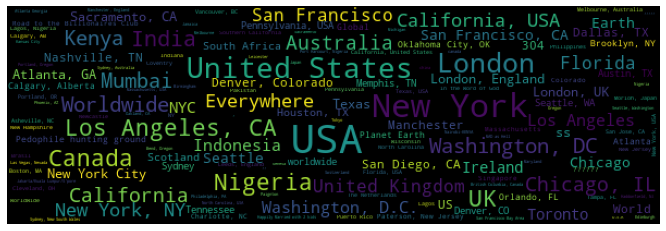

--------------------------------------------------------------------------------------------------
keywords
--------------------------------------------------------------------------------------------------
[nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demol

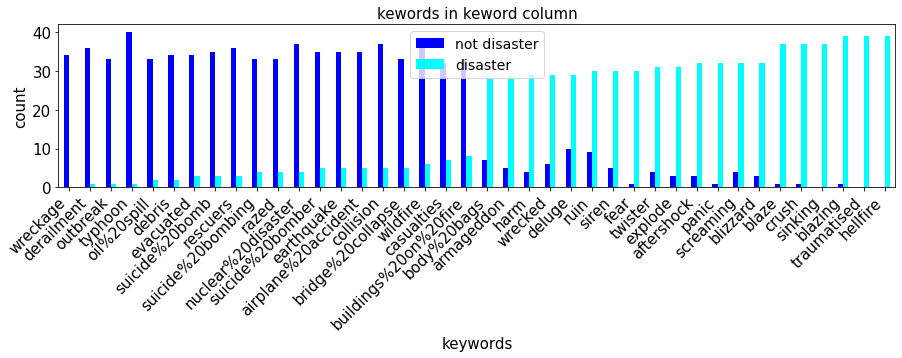

--------------------------------------------------------------------------------------------------
text
--------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------
sample tweets labeled as disasters
--------------------------------------------------------------------------------------------------


3016    I learned more about economics from one South Dakota dust storm than I did in all my years in college.  -Hubert Humphrey                    
190     http://t.co/FCqmKFfflW Twelve feared killed in Pakistani air ambulance helicopter crash http://t.co/vAyaYmbNgu                              
5252    Sydney Traffic HAZARD Oil spill - BANKSTOWN Stacey St at Wattle St #sydtraffic #trafficnetwork                                              
5551    'Three #people were #killed when a severe #rainstorm in the #Italian #Alps caused a #landslide' http://t.co/hAXJ6Go2ac                      
7293    WIN: Lisowski whitewashes the Whirlwind 5-0 in round 2 of Shanghai Masters Quals! |  http://t.co/MLigPUHVOh #snooker http://t.co/TcS2Cd5y6y 
1014    ÛÏ@MacDaddy_Leo: ?????? No Caption Needed ??. Freshman... http://t.co/k8ughv2aifÛmy nigga Stacey body bagging niggas! ????               
895     Bloody insomnia again! Grrrr!! #Insomnia                                                          

--------------------------------------------------------------------------------------------------
sample tweets labeled as NOT disasters
--------------------------------------------------------------------------------------------------


5968    @ArianaGrande @justinbieber I'M SCREAMING OMG #IDOLS #22DAYS #WDYM                                                                    
6299    Stretcher brought out for Vampiro. Cut to commercial isn't a good sign. #UltimaLucha #LuchaUnderground                                
6565    Dying with debt can be costly for survivors                                                                                           
845     What is the biggest regret you have in hearthstone? http://t.co/vcIrn1Md8v                                                            
1732    OMG OMG OMG #JustinBieber and #HarryStyles have collided in a nuclear accident at #Cern ^oo^\n\n#HarryBeCareful http://t.co/p4huQUNDQi
5211    Just absolutely obliterated a moth my new purchase is boss                                                                            
5871    You can only make yourself happy. Fuck those tryna ruin it keep smiling ??                                                            

In [3]:
df_1=train_data.copy()

dk_formatting.code_section_break('Basic Visual Exploration')
pd.set_option('display.max_colwidth', 1)
#Visual Exploration
display(df_1.head(5))
print(f'The shape of this table is {df_1.shape}')
print(f'The keys of this table are {df_1.keys()}')

#Label the keys
id_key=0
text_key=3
y_key=4

# look at locations
dk_formatting.code_section_break('location')
location_freq=df_1["location"].value_counts()
plt.figure(figsize=(12,4))
#Instantiate wordcloud object and use method to feed it our corpus
#wc = WordCloud(width=2000, height=400).generate_from_text(rome_corpus)
wc0 = WordCloud(width=600, height=200,
               max_words=150,colormap='viridis',
               prefer_horizontal=0.99,
               relative_scaling=0.5,
                max_font_size=36 ).generate_from_frequencies(location_freq)

#Use matplotlib.pyplot to display the fitted wordcloud
#Turn axis off to get rid of axis numbers
plt.imshow(wc0)
plt.axis('off')
plt.show()


##############################################################################
#collect the keywords
dk_formatting.code_section_break('keywords')
print(df_1.keyword.unique())

positive_freq=df_1.loc[df_1[df_1.keys()[y_key]] == 1]["keyword"].value_counts()
negative_freq=df_1.loc[df_1[df_1.keys()[y_key]] == 0]["keyword"].value_counts()

# selected_keywords=list(dict.fromkeys(positive_freq.index.tolist()+negative_freq.index.tolist()))
selected_keywords=positive_freq.index.tolist()[0:20]+negative_freq.index.tolist()[0:20]

df_keyword_collection = df_1[df_1.keyword.isin(selected_keywords)].copy()
CT=pd.crosstab(df_keyword_collection.keyword, df_keyword_collection[df_1.keys()[y_key]])

CT.sort_values(by=1, ascending=True, inplace=True)

#plot the keywords
legend_labels= ['not disaster','disaster'] #corresponding to [0,1]  truth values
x_axis_title= 'keywords'
y_axis_title='count'
x_label=selected_keywords
title_str= 'kewords in keword column'
output_file_name='kewords_count.png'
save_image='NO'  ,#'YES' will allow to print
plot1_labels=dk_VT.PLOT_LABEL(legend_labels,x_axis_title,y_axis_title,x_label,title_str,output_file_name,save_image)
dk_VT.plot_bar_x(CT,plot1_labels)



######################################################################################
#sample tweets
dk_formatting.code_section_break('text')
dk_formatting.code_section_break('sample tweets labeled as disasters')
display(df_1.loc[df_1[df_1.keys()[y_key]] == 1]['text'].sample(n = 15, random_state=0))
dk_formatting.code_section_break('sample tweets labeled as NOT disasters')
display(df_1.loc[df_1[df_1.keys()[y_key]] == 0]['text'].sample(n = 15, random_state=0))




# Clean Data

A function is applied to the text to change all URLs to the string URL. Also, mentions of a user lead to including a USRTAG before the username.  

Combing through the tweets that were identified as false negatives in the first round, it became clear that some of these tweets are not correctly labeled. Replacing them, doesn't improve performance, likely because the same style of labeling errors are present in the test set of kaggle. 

Removing tweets that countain the same text also doesn't really improve the score. 


In [4]:
train_data_proc=df_1
display_set_0=[1,32,41,48,49,50,51,52]
train_data_proc["df_text_cleaner"]= df_1["text"].apply(dk_TM.df_txt_cleaner)
display(train_data_proc[train_data_proc['id'].isin(display_set_0)])


,id,keyword,location,text,target,df_text_cleaner
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
21,32,NaN,NaN,London is cool ;),0,London is cool ;)
29,41,NaN,NaN,Do you like pasta?,0,Do you like pasta?
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1,USRTAG bbcmtd Wholesale Markets ablaze URL
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0,We always try to bring the heavy. #metal #RT URL
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. URL
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,Crying out for more! Set me ablaze


In [5]:

# reassignments_toFALSE=[356,390,796,834,856,1409,881,1723,1676,1760,1968,3221,3270,3810,3879,4080,4499,4659,5564,5580,5662,6012,6097,6112,6138,6788,6191,6223,7002,7362,7415,7844,7860,7862,8296,8314,8698,8902,9472,9499,9783,9794,10583]
# reassignments_toTRUE_maybe=[5959,5247,6217,6566,8044,10110]
# reassignments_toTRUE_moreconfident=[6243,8288]
# ambiguous=[2400,4051,5228,5247,6336,6537]

# train_data_relabel=train_data_proc.copy()
# train_data_relabel['target'].iloc[train_data_relabel['id'].isin(reassignments_toFALSE)]=0
# train_data_relabel['target'].iloc[train_data_relabel['id'].isin(reassignments_toTRUE_moreconfident)]=1

# display(train_data_relabel[train_data_relabel['id'].isin(reassignments_toFALSE)].head(5))


In [6]:
# #remove duplicates
# train_data_drop_1,report_1=dk_df.df_remove_duplicates(train_data_proc,'df_text_cleaner','target')
# start_tweet=125

# #search for items to relabel
# #display(train_data_proc[train_data_proc['id'].isin(report)][start_tweet:start_tweet+5])

# #remove duplicates from the relabeled data
# train_data_drop_2,report_2=dk_df.df_remove_duplicates(train_data_relabel,'df_text_cleaner','target')

# Feature Engineering

The keyword list is used to extract the keywords present in the text. In addition, there are some anti-keywords which are words which indicate the text is not a disaster (politics,sports,arts). These words are also extracted from the text. Then the set of kewords and word are used as a basis set, and the tweets are mapped to a vector using this basis set. 

In [7]:
def anti_keywords():
    #diaster words are used 
    new_words=['first%lady']
    politics_list=[ ' libertarian democrat dems republican trump GOP GoP senate']
    game_list=[ ' TIX tix tickets game player ball score coach ']
    art_list=[' ft feat featuring novel book movie'  ]
    return [politics_list[0]+game_list[0]+art_list[0]]
   

In [8]:
keyword_list=dk_df.make_keywords_all(df_1,y_key)[0]
keyword_str=dk_df.make_keywords_all(df_1,y_key)[1]
game_list=[ ' TIX tix tickets game player ball score coach ']
politics_list=[ ' libertarian democrat dems republican trump GOP GoP senate']
anti_keyword_list=anti_keywords()

text_choice='text'
train_data_proc["extracted_keywords"]= df_1[text_choice].apply(dk_TM.collect_keywords_simplified2,args=([keyword_str]))
train_data_proc["extracted_politicslist"]= df_1[text_choice].apply(dk_TM.collect_keywords_simplified2,args=(politics_list))
train_data_proc["extracted_gamelist"]= df_1[text_choice].apply(dk_TM.collect_keywords_simplified2,args=(game_list))
train_data_proc["extracted_anti_keywordslist"]= df_1[text_choice].apply(dk_TM.collect_keywords_simplified2,args=(anti_keywords())) 

politics_tweets=[1999,1981,3225]
false_negatives=[328,3802,7205,2213,6519,9607,762]
representative_tweet=display_set_0+[2,4,10]+false_negatives+politics_tweets


pd.set_option('display.max_colwidth', 1)
train_data_proc.style.set_properties(**{'text-align': 'left'})
display(train_data_proc[train_data_proc['id'].isin(representative_tweet)].drop(columns=['location']))



,id,keyword,text,target,df_text_cleaner,extracted_keywords,extracted_politicslist,extracted_gamelist,extracted_anti_keywordslist
0,1,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,earthquake,,,
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,forest%20fire fire,,,
6,10,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",flood disaster flood flooding,,,
21,32,NaN,London is cool ;),0,London is cool ;),,,,
29,41,NaN,Do you like pasta?,0,Do you like pasta?,,,,
31,48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1,USRTAG bbcmtd Wholesale Markets ablaze URL,ablaze blaze,,,
32,49,ablaze,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0,We always try to bring the heavy. #metal #RT URL,,,,
33,50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. URL,ablaze blaze,,,
34,52,ablaze,Crying out for more! Set me ablaze,0,Crying out for more! Set me ablaze,ablaze blaze,,,
229,328,annihilated,Ready to get annihilated for the BUCS game,1,Ready to get annihilated for the BUCS game,annihilated,,game,game


In [9]:
df=train_data
#train_data 
#train_data_relabel
#train_data_drop_1,train_data_drop_2

keyword_list= dk_df.make_keywords(df,y_key)[1]+anti_keywords()[0]
count_vect=dk_FF.ff_preproc(df,keyword_list)
FF_creator=dk_FF.feature_frame_creator_disastertweets2

#labels
y_labels=df[df.keys()[y_key]].copy()

# Model: selection, fit, performance 

/kaggle/input/dk-toolbox/feature_frames.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text']=df['text'].apply(dk_TM.df_txt_cleaner)


Minimum Validation Loss: 0.5044


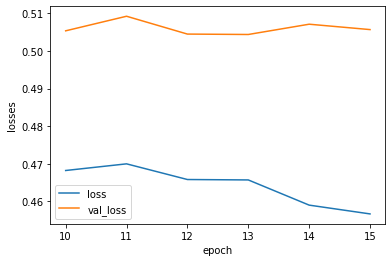

<Figure size 432x288 with 0 Axes>

In [10]:

X_train_pre, X_test_pre, y_train, y_test = train_test_split(df,y_labels, random_state=0)
X_train=FF_creator(X_train_pre,count_vect,[keyword_list])
X_test=FF_creator(X_test_pre,count_vect,[keyword_list])

input_shape = [X_train.shape[1]]
#########################################################################################

#select model
model= keras.Sequential([
    layers.Dense(150, activation='relu', input_shape=input_shape),
    layers.Dropout(rate=0.3),
    layers.Dense(150, activation='relu'),  
    layers.Dense(150, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
]) 

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=100,
    callbacks=[early_stopping],
    verbose=0
)

# #score
# Start the plot at epoch 10
history_df = pd.DataFrame(history.history)
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));
plt.xlabel("epoch")
plt.ylabel("losses")
plt.show()
plt.clf()



#The dependence of scoring on the probability threshold
collect_set=np.arange(.1,1,.1)
fp=np.zeros(len(collect_set))
fn=np.zeros(len(collect_set))
tp=np.zeros(len(collect_set))
tn=np.zeros(len(collect_set))
counter_0=0
for threshold in collect_set:
    matrix = confusion_matrix(y_test,(model.predict(X_test)>threshold).astype('int32'))
    tn[counter_0]=matrix[0,0]
    fp[counter_0]=matrix[0,1]
    fn[counter_0]=matrix[1,0]
    tp[counter_0]=matrix[1,1]
    counter_0+=1

# plt.plot(collect_set,tp/(tp+fp),label="precision")
# plt.plot(collect_set,tp/(tp+fn),label="recall")

# plt.xlabel("threshold value")
# plt.legend(loc='upper left')
# plt.ylabel("")
# plt.show()

# Model Prediction for submission

In [11]:
# #predict
#y_predict=(model.predict(FF_creator(test_data,count_vect,train_data,y_key))>0.5).astype('int32')
y_predictproba=model.predict(FF_creator(test_data,count_vect,[keyword_list]))
y_predict=(y_predictproba>0.5).astype('int32')


# #output formating
sample_submission[df.keys()[y_key]]=y_predict

# print(output)
sample_submission.to_csv("submission.csv",index=0)

# Post-Run Analysis

With the threshold of 0.5, there are a large number of false negatives. When we look at 15 of these false negative identifications, we can see that a number of them have an incorrect truth value and are clearly about sports or culture(books, songs). Some are potentially ambiguous, and a smaller fraction are correctly identified as false negatives. 

Based on these observatons, the following changes were implemented in the next version:
* antikeywords
* a manual relabeling for repeated tweets 

In [12]:
threshold=0.5
y_predictproba=model.predict(X_test)
y_predicted=(y_predictproba>0.5).astype('int32')
true_neg, false_pos,false_neg,true_pos=dk_df.post_proc_truth_tweet(y_predicted,X_test_pre,y_test)
false_neg['keywords']=false_neg['text'].apply(dk_TM.collect_keywords_simplified2,args=([keyword_str]))
false_pos['keywords']=false_pos['text'].apply(dk_TM.collect_keywords_simplified2,args=([keyword_str]))
print(false_neg.shape)
display(false_neg.head(15))
display(false_pos.head(10) ) 
print(false_pos.shape)


(255, 5)


,text,predicted,truth,id,keywords
1531,Russian nuclear-biological-chemical (NBC) brigade 'emergency response' exercise in Southern MD http://t.co/Ul5XdblmBk http://t.co/VjHpVLnbaw,0,1,2213,emergency
4585,Carterville High School coaches prepare for game-day injuries http://t.co/kKiMMBUe04,0,1,6519,injuries
224,@violentfeminazi I guess that's ok for Armenians since we've spent most of our history getting annihilated,0,1,318,annihilated
6707,@HaydnExists so glad i saved them all at once then didnÛªt want you stealing my thunder :P,0,1,9607,thunder
2030,What is this? Like I could be in danger or something,0,1,2913,danger
229,Ready to get annihilated for the BUCS game,0,1,328,annihilated
2764,@Pam_Palmater i agree with @perrybellegarde to get out &amp; vote. Look at devastation @pmharper caused #FirstNations #IdleNoMore #cndpoli #yyj,0,1,3970,devastation
2648,Apollo Brown ft. M.O.P- Detonate - http://t.co/OMfGv9ma1W,0,1,3802,detonate
273,ohH NO FUKURODANI DIDN'T SURVIVE THE APOCALYPSE BOKUTO FEELS HORRIBLE my poor boy my ppor child,0,1,397,survive apocalypse
7105,Violent Forces Radio: Now Playing Acid Storm - Scourgue Of The Gods\nTuneIn Player @ http://t.co/XsSgEdSbH4,0,1,10179,storm


,text,predicted,truth,id,keywords
6362,If you ever think you running out of choices in life rembr there's that kid that has no choice but wear a suicide bomb vest,1,0,9094,suicide%20bomb bomb
1833,Thief Broke Front Window Of Hicksville Store Stole 50 Cell Phones; Fled Crashed Into... http://t.co/6odNBttPSq,1,0,2635,crash crashed
6592,Haley Lu Richardson Fights for Water in The Last Survivors (Review) http://t.co/oObSCFOKtQ,1,0,9439,survivors
3169,4 Printable Emergency Plan Templates\nhttp://t.co/nAex0Q1Ax0,1,0,4548,emergency emergency%20plan
3319,Evacuate from your life.,1,0,4754,evacuate
7412,Have you ever seen the President \nwho killed your wounded child?\nOr the man that crashed your sister's plane \nclaimin' he was sent of God?,1,0,10605,wounded crash crashed
5699,Rescued TB goes on to ribbon at HITS: http://t.co/pA5SSLeFEC via @offtrackhorse,1,0,8133,rescue rescued
1824,@olliebailey11 havnt you crashed ? ??,1,0,2622,crash crashed
1087,The bomb was so appropriate ?? seen as my family and most Jamaicans love shout bullets !,1,0,1572,bomb
2131,Breast milk is the original #superfood but rates worldwide have stalled below 40% contributing to more than 800000 child deaths last year.,1,0,3059,death deaths


(197, 5)
